In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
from pprint import pprint

In [139]:
df = sns.load_dataset("iris")

In [140]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [141]:
df = df.rename(columns={"species":"target"})
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [143]:
def train_test_split(df, test_size):
    
    if isinstance(test_size,float):
        test_size = round(test_size*len(df))
        
    indices = df.index.tolist()
    test_indices = random.sample(population = indices, k=test_size)
    
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [144]:
train_df, test_df= train_test_split(df, test_size=0.2)

In [145]:
len(df)

150

In [146]:
len(test_df)

30

In [147]:
data = train_df.values

In [148]:
def checking(data):
    label_column = data[:,-1]
    uniqueClass = np.unique(label_column)
    if len(uniqueClass)==1:
        return True
    else:
        return False


In [149]:
def classify(data):
    label_column = data[:,-1]
    uniqueClasses, counts_unique = np.unique(label_column,return_counts =True)
    index = counts_unique.argmax()
    classification = uniqueClasses[index]
    return classification

In [150]:
classify(train_df[train_df.petal_width>1.2].values)

'virginica'

In [151]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
8,4.4,2.9,1.4,0.2,setosa


In [152]:
def splits(data):
    potential_splits = {}
    rows , columns = data.shape
    for column_index in range(columns-1):
        potential_splits[column_index] = []
        values = data[:,column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index!= 0:
                current_value = unique_values[index]
                previous_value = unique_values[index-1]
                potential_split = (current_value + previous_value) / 2

                potential_splits[column_index].append(potential_split)
    return potential_splits

In [172]:
potential_splits = splits(train_df.values)

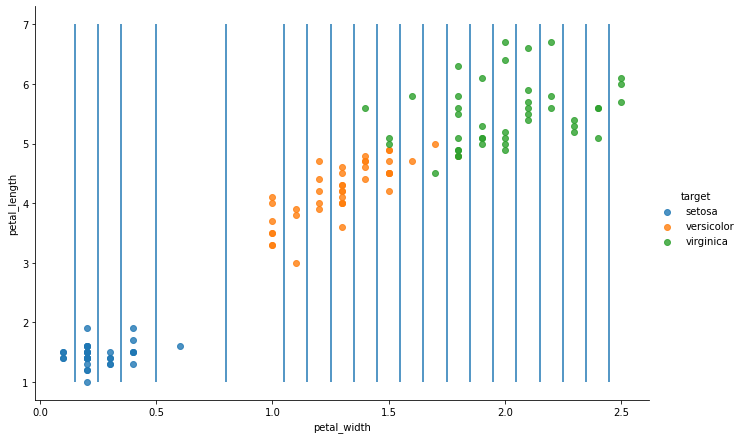

In [154]:
sns.lmplot(data=train_df,
           x='petal_width', 
           y = 'petal_length', 
           hue = 'target',
           height=6,
           aspect=1.5,
           fit_reg=False)
plt.vlines(x=potential_splits[3],ymin=1,ymax=7)

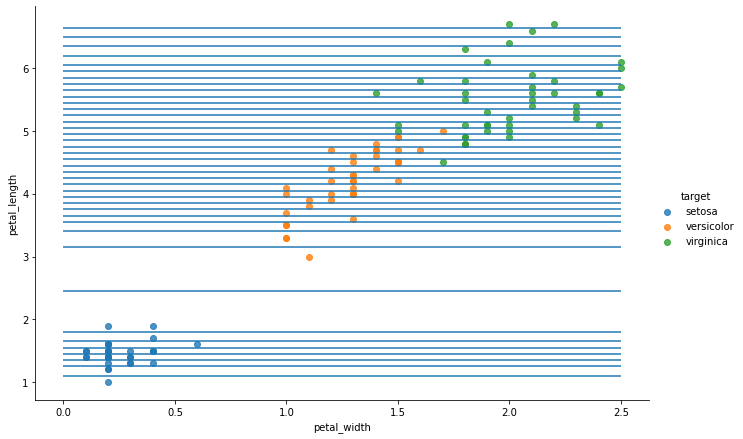

In [155]:
sns.lmplot(data=train_df,
           x='petal_width', 
           y = 'petal_length', 
           hue = 'target',
           height=6,
           aspect=1.5,
           fit_reg=False)
plt.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

In [156]:
def split_data(data, split_column, split_value):
    split_column_values = data[:,split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values > split_value]
    return data_below, data_above

In [163]:
split_column = 3
split_value = 0.8

In [164]:
data_below, data_above = split_data(data, split_column, split_value)

(0.0, 2.6)

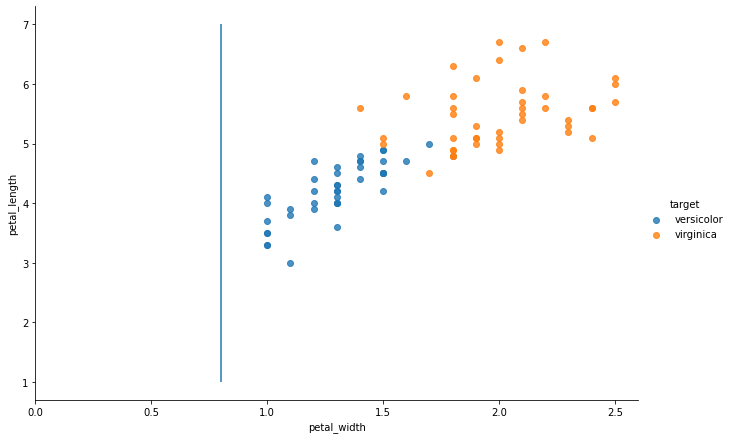

In [165]:
plotting_df = pd.DataFrame(data_above,columns=df.columns)

sns.lmplot(data=plotting_df, x='petal_width', y = 'petal_length', fit_reg=False, height=6, aspect=1.5, hue='target')
plt.vlines(x=split_value,ymin=1,ymax=7)
plt.xlim(0,2.6)

In [166]:
def calculate_entropy(data):
    label_column = data[:,-1]
    Labels , counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities* -np.log2(probabilities))
    return entropy

In [167]:
def calculate_overall_entropy(data_below,data_above):
    data_point = len(data_below)+len(data_above)

    p_data_below = len(data_below)/ data_point
    p_data_above = len(data_above)/data_point

    overall_entropy = (p_data_below * calculate_entropy(data_below)) + (p_data_above * calculate_entropy(data_above))
    return overall_entropy

In [168]:
calculate_overall_entropy(data_below, data_above)

0.708262611356721

In [178]:
def determine_best_split(data, potential_splits):
    overall_entropy = 1000
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data,split_column=column_index,split_value = value)
            current_overall_entropy = calculate_overall_entropy(data_below,data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    return best_split_column, best_split_value

In [179]:
determine_best_split(data,potential_splits)

(3, 0.8)

In [180]:
def decision_tree(df,counter=0):
    
    if counter == 0:
        data = df.values
    else:
        data = df
        
    if checking(data):
        classification = classify(data)
        return classification
    
    else:
        counter+=1
        
        potential_splits = splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        question = '{} <= {}'.format(split_column, split_value)
        sub_tree = {question: []}
        
        yes = decision_tree(data_below,counter)
        no = decision_tree(data_above,counter)
        
        sub_tree[question].append(yes)
        sub_tree[question].append(no)
        
        return sub_tree

In [186]:
tree = decision_tree(train_df)
pprint(tree)

{'3 <= 0.8': ['setosa',
              {'3 <= 1.75': [{'2 <= 4.95': [{'3 <= 1.65': ['versicolor',
                                                           'virginica']},
                                            {'3 <= 1.65': ['virginica',
                                                           'versicolor']}]},
                             {'2 <= 4.85': [{'1 <= 3.1': ['virginica',
                                                          'versicolor']},
                                            'virginica']}]}]}
